# Weekly assignment 10.1: Numerical integration

In this exercise you will compare several integration schemes for
several different functions.

Compute the following expressions:

1. $ \int_0^8 \exp(-x/4) sin(x) dx $  
1. $ \int_0^8 \big| \exp(-x/4) sin(x) \big| dx $ (similar to above but with the absolute value)  
1. $ E\{ \exp(-x/4) sin(x) \} $, where $ x $ is normally distributed with parameters $ \mu=0 $, $ \sigma=1 $.  


For each use the following integration schemes:

1. Monte Carlo integration  
1. Trapezoid rule on a simple linear grid  
1. Gauss-Legendre quadrature or Gauss-Hermite quadrature (whichever is appropriate)  


In each integration scheme start with a low number of grid points (Monte Carlo draws) and sequentially increase the number of point while computing the change in the result of
calculation (reduction of the error).

Plot these step-by-step changes in the integrals for each of the integration scheme applied for each of the expressions.

Discuss which scheme is preferable in which case.

In [1]:
# Packages 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [2]:
f = lambda x: np.exp(-x/4) * np.sin(x)

In [3]:
def monte_carlo(f, a, b, N):
    '''Approximate the definite integral of f(x) between a and b using N random points'''
    
    x = np.linspace(a, b, N)
    y =  f(x)
    f_max = max(y)
    f_min = min(y)
    
    x_rand = a + np.random.random(N) * (b - a)
    y_rand = f_min + np.random.random(N) * (f_max - f_min)

    ind_below = np.where(y_rand < f(x_rand))
    ind_above = np.where(y_rand >= f(x_rand))

    y_rand_below = y_rand[ind_below]
    y_rand_above = y_rand[ind_above]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x, y, color='r')
    
    count = 0
    for i in range(y_rand_below.size):
        if y_rand[ind_below][i] > 0:
            ax.scatter(x_rand[ind_below][i], y_rand[ind_below][i], color="green")
            count += 1
        else:
            ax.scatter(x_rand[ind_below][i], y_rand[ind_below][i], color="blue")
    
    for i in range(y_rand_above.size):
        if y_rand[ind_above][i] > 0:
            ax.scatter(x_rand[ind_above][i], y_rand[ind_above][i], color="blue")
        else:
            ax.scatter(x_rand[ind_above][i], y_rand[ind_above][i], color="green")
            count += 1
    
    plt.show()
    return print("Integral =", (f_max - f_min) * (b - a) * (count) / N)

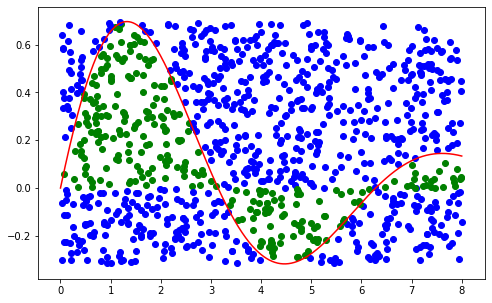

Integral = 2.2469703841904245


In [4]:
monte_carlo(f, 0, 8, 1000)

In [5]:
def trapezoid(f, a, b, M, N):
    '''Intergrating using the trapezoidal rule'''
    
    x = np.linspace(a, b, N)
    grid = np.linspace(a, b, M)
    y =  f(grid)
    
    # Storage space
    T = np.zeros(grid.size)
    
    Δx = (b - a)/N
    
    for i in range(x.size - 1):
        T[i] = f(grid[i + 1]) + f(grid[i])
        
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(grid, y, color='r')
    
    for i in range(N -1):
        xs = [x[i],x[i],x[i+1],x[i+1]]
        ys = [0,f(x[i]),f(x[i+1]),0]
        plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)
    
    plt.show()
        
    return print("Integral =",(Δx / 2) * np.sum(T))

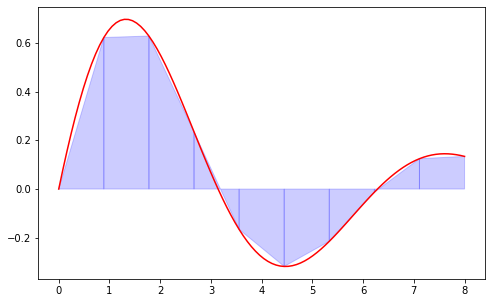

Integral = 2.2205756135434673


In [6]:
trapezoid(f, 0, 8, 100, 10) 

In [7]:
def Legendre_polynomial(x, n):
    '''Defines the Legendre Polynomial'''
    
    # Storage space
    P = np.zeros(n)
    
    P[0] = 1.0
    P[1] = x
    
    for i in range(n - 1):
        P[i + 1] = ((2*i + 1)/(i + 1) * x * P[i]) - (i/(i + 1) * P[i -1])
        
    return P[-1]

In [8]:
def root_finder(p, grid):
    '''Function that finds all the root to the Legendre Polynomial'''
    
    # Storage space
    roots = []
    
    for i, j in enumerate(grid - 1):
        if p(grid[i]) * p(grid[i-1]) > 0:
            pass
        else:
            roots.append(brentq(p, grid[i-1], grid[i]))
            
    return np.asarray(roots) 

In [9]:
grid = np.linspace(-1, 1, 100)

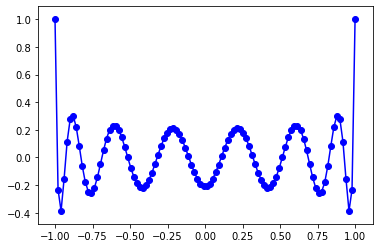

In [10]:
p = lambda x: Legendre_polynomial(x, 15)
p_func = np.zeros(grid.size)
for i, j in enumerate(grid):
    p_func[i] = p(j)
    plt.scatter(j, p(j), color='b')
plt.plot(grid, p_func, color='b')
plt.show()

In [11]:
x_grid = root_finder(p, grid)[1::]

In [12]:
def Lagrange_polynomial(x, i, x_grid):
    
    prod = np.ones(x_grid.size)
    
    for k, x_k in enumerate(x_grid):
        x_grid = np.delete(x_grid, k)
        prod[i] = (x - x_grid[i])/(x_k - x_grid[i])
        x_grid = np.insert(x_grid, k, x_k)
    
    return np.prod(prod)

In [13]:
b = 8
a = 0

h = b - a
c = (a + b)/2

x = (h / 2) * x_grid + c

np.sum(f(x))

2.013678649148851